In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Data preprocessing

In [20]:
# load the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# since PCA is variance sensitive, wee need to scale the data

X = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']].values
y = df.loc[:,['target']].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## PCA

Below I perform PCA with a given percentage of variance explained and examine how many features (principal components) are needed to preserve the given varaince.

In [22]:
variance_explained_perc = np.linspace(0.1, 1.0, 10)
number_of_princip_components = []

for ve in variance_explained_perc:
    if ve == 1.0:
        number_of_princip_components.append(PCA().fit(X).n_components_)
    else:
        number_of_princip_components.append(PCA(n_components=ve).fit(X).n_components_)

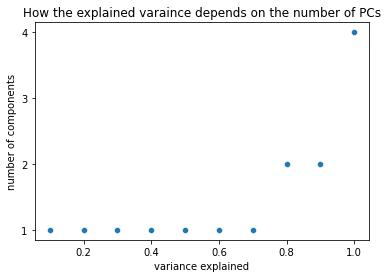

In [60]:
ax = sns.scatterplot(x=variance_explained_perc, y=number_of_princip_components)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("variance explained")
plt.ylabel("number of components")
plt.title("How the explained varaince depends on the number of PCs")
plt.show()

We can see that to preserve quite a high data variance (70 percents), we need only one feature out of 4 (one principal component). To get 90% - two principal components are enough. We can also plot the cummulative explained variance. Plot below.

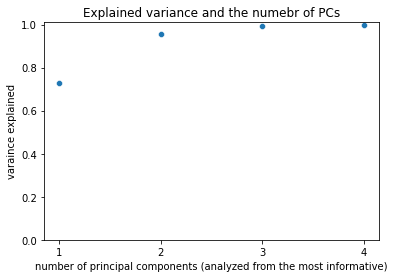

In [57]:
cum_expl_var = np.cumsum(PCA().fit(X).explained_variance_ratio_)
number_of_pc = [1, 2, 3, 4]

ax = sns.scatterplot(x=number_of_pc, y=cum_expl_var)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("number of principal components (analyzed from the most informative)")
plt.ylim(0, 1.01)
plt.ylabel("varaince explained")
plt.title("Explained variance and the numebr of PCs")
plt.show()

## Comparing PCA and Kernel PCA.

Below I compare different PCA variants - base PCA (with linear kernel) and a few other kernels. I visualize their principal components on the 2D and 3D plots.

In [145]:
def plot2dIris(X, y, ax, title):
    x_pca = pd.DataFrame(X) 
    x_pca['target']=y
    x_pca.columns = ['PC1','PC2','target']

    ax.set_xlabel('Principal Component 1') 
    ax.set_ylabel('Principal Component 2') 
    ax.set_title(title) 

    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = x_pca['target'] == target
        ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
        , x_pca.loc[indicesToKeep, 'PC2']
        , c = color
        , s = 50)
    ax.legend(targets)
    ax.grid()


def plot3dIris(X, y, ax, title):
    x_pca = pd.DataFrame(X) 
    x_pca['target']=y
    x_pca.columns = ['PC1','PC2', 'PC3','target']

    ax.set_xlabel('Principal Component 1') 
    ax.set_ylabel('Principal Component 2') 
    ax.set_zlabel('Principal Component 3') 
    ax.set_title(title) 

    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = x_pca['target'] == target
        ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
        , x_pca.loc[indicesToKeep, 'PC2']
        , x_pca.loc[indicesToKeep, 'PC3']
        , c = color)
    ax.legend(targets)
    ax.grid()


In [190]:
def plot4_2d(X1, X2, X3, X4, title1, title2, title3, title4):
    fig = plt.figure(figsize=(20, 6))

    ax1 = fig.add_subplot(1, 4, 1) 
    plot2dIris(X1, y, ax1, title1)
    ax2 = fig.add_subplot(1, 4, 2) 
    plot2dIris(X2, y, ax2, title2)
    ax3 = fig.add_subplot(1, 4, 3) 
    plot2dIris(X3, y, ax3, title3)
    ax4 = fig.add_subplot(1, 4, 4) 
    plot2dIris(X4, y, ax4, title4)

def plot4_3d(X1, X2, X3, X4, title1, title2, title3, title4):
    fig = plt.figure(figsize=(20, 6))

    ax1 = fig.add_subplot(1, 4, 1, projection='3d') 
    plot3dIris(X1, y, ax1, title1)
    ax2 = fig.add_subplot(1, 4, 2, projection='3d') 
    plot3dIris(X2, y, ax2, title2)
    ax3 = fig.add_subplot(1, 4, 3, projection='3d') 
    plot3dIris(X3, y, ax3, title3)
    ax4 = fig.add_subplot(1, 4, 4, projection='3d') 
    plot3dIris(X4, y, ax4, title4)

## Basic (linear) PCA

In [204]:
X_lin2 = KernelPCA(kernel='linear', n_components=2).fit_transform(X)
X_lin3= KernelPCA(kernel='linear', n_components=3).fit_transform(X)

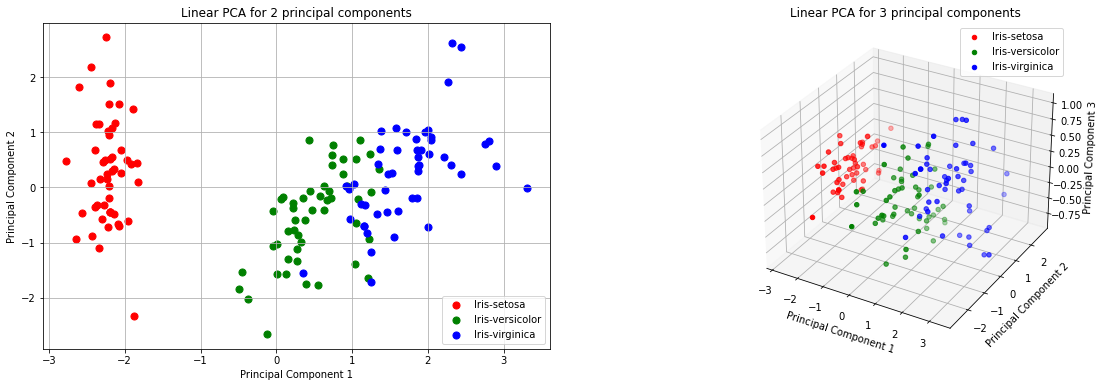

In [205]:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(1, 2, 1) 
plot2dIris(X_lin2, y, ax1, "Linear PCA for 2 principal components")

ax2 = fig.add_subplot(1, 2, 2, projection='3d') 
plot3dIris(X_lin3, y, ax2, "Linear PCA for 3 principal components")

Since Iris is a simple dataset, applying the linear PCA gives pretty well separated data against 2 first principal components. Taking the third component does not seem to imporve the differences between classes.

## Cosine kernel

In [206]:
X_cos2 = KernelPCA(kernel='cosine', n_components=2).fit_transform(X)
X_cos3 = KernelPCA(kernel='cosine', n_components=3).fit_transform(X)

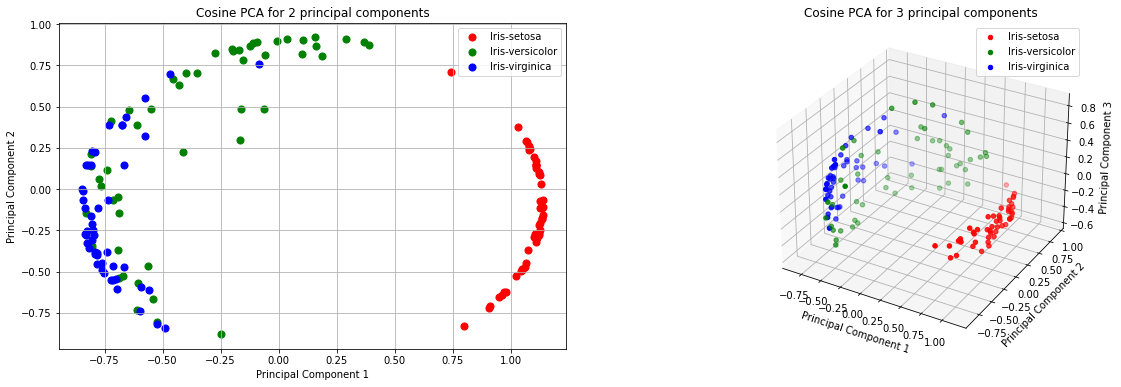

In [208]:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(1, 2, 1) 
plot2dIris(X_cos2, y, ax1, "Cosine PCA for 2 principal components")

ax2 = fig.add_subplot(1, 2, 2, projection='3d') 
plot3dIris(X_cos3, y, ax2, "Cosine PCA for 3 principal components")

The separarion of classes does not significantly impoerved in comparison to the linear PCA, but its worth noticing the shape of transformed data distribution (circle/spere based).

## Radius kernel for different gamma parameter

In [191]:
X_rad2_g1 = KernelPCA(kernel='rbf', n_components=2, gamma=1).fit_transform(X)
X_rad2_g2 = KernelPCA(kernel='rbf', n_components=2, gamma=2).fit_transform(X)
X_rad2_g5 = KernelPCA(kernel='rbf', n_components=2, gamma=5).fit_transform(X)
X_rad2_g7 = KernelPCA(kernel='rbf', n_components=2, gamma=7).fit_transform(X)

X_rad3_g1= KernelPCA(kernel='rbf', n_components=3, gamma=1).fit_transform(X)
X_rad3_g2 = KernelPCA(kernel='rbf', n_components=3, gamma=2).fit_transform(X)
X_rad3_g5 = KernelPCA(kernel='rbf', n_components=3, gamma=5).fit_transform(X)
X_rad3_g7 = KernelPCA(kernel='rbf', n_components=3, gamma=7).fit_transform(X)

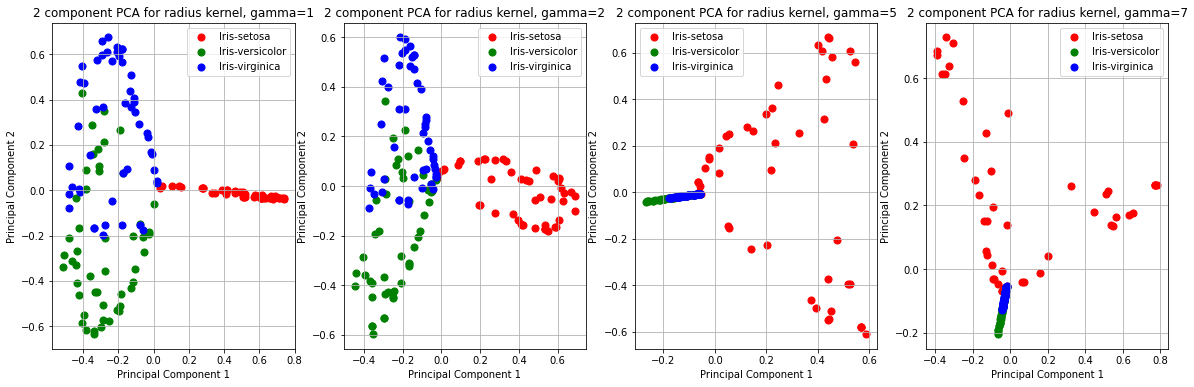

In [192]:
plot4_2d(X_rad2_g1, X_rad2_g2, X_rad2_g5, X_rad2_g7,
    "2 component PCA for radius kernel, gamma=1",
    "2 component PCA for radius kernel, gamma=2",
    "2 component PCA for radius kernel, gamma=5",
    "2 component PCA for radius kernel, gamma=7")


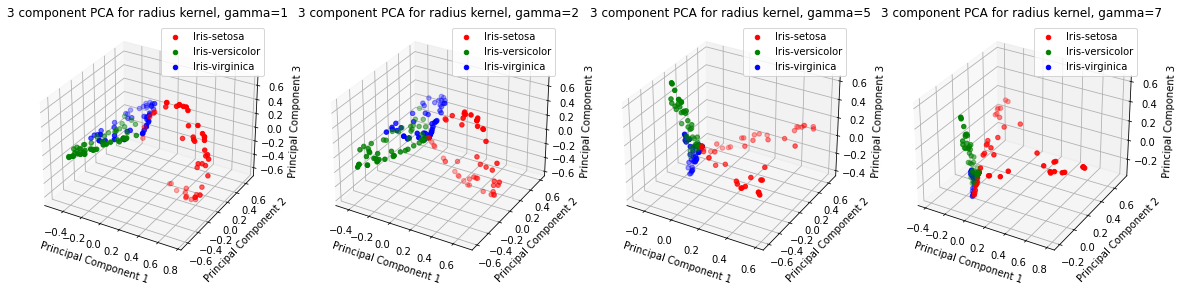

In [193]:
plot4_3d(X_rad3_g1, X_rad3_g2, X_rad3_g5, X_rad3_g7,
    "3 component PCA for radius kernel, gamma=1",
    "3 component PCA for radius kernel, gamma=2",
    "3 component PCA for radius kernel, gamma=5",
    "3 component PCA for radius kernel, gamma=7")


From the above 2d plots we can notice that parameters gamma = 1 or 2 are better fitted than 5, 7 (Classes versicolor and virginica are in a similar position on the plot in the case of gamma = 5 or 7). On the other hand, taking 3 principal components (3d plots), we can gain better data separation, and highest gamma works quite okay as well. On some 3d plots we can see the radial character of data (e.g., first 3d plot - setosa).

## Sigmoid kernel for different gamma parameter

In [196]:
X_sig2_g1 = KernelPCA(kernel='sigmoid', n_components=2, gamma=1).fit_transform(X)
X_sig2_g2 = KernelPCA(kernel='sigmoid', n_components=2, gamma=2).fit_transform(X)
X_sig2_g5 = KernelPCA(kernel='sigmoid', n_components=2, gamma=5).fit_transform(X)
X_sig2_g7 = KernelPCA(kernel='sigmoid', n_components=2, gamma=7).fit_transform(X)

X_sig3_g1= KernelPCA(kernel='sigmoid', n_components=3, gamma=1).fit_transform(X)
X_sig3_g2 = KernelPCA(kernel='sigmoid', n_components=3, gamma=2).fit_transform(X)
X_sig3_g5 = KernelPCA(kernel='sigmoid', n_components=3, gamma=5).fit_transform(X)
X_sig3_g7 = KernelPCA(kernel='sigmoid', n_components=3, gamma=7).fit_transform(X)

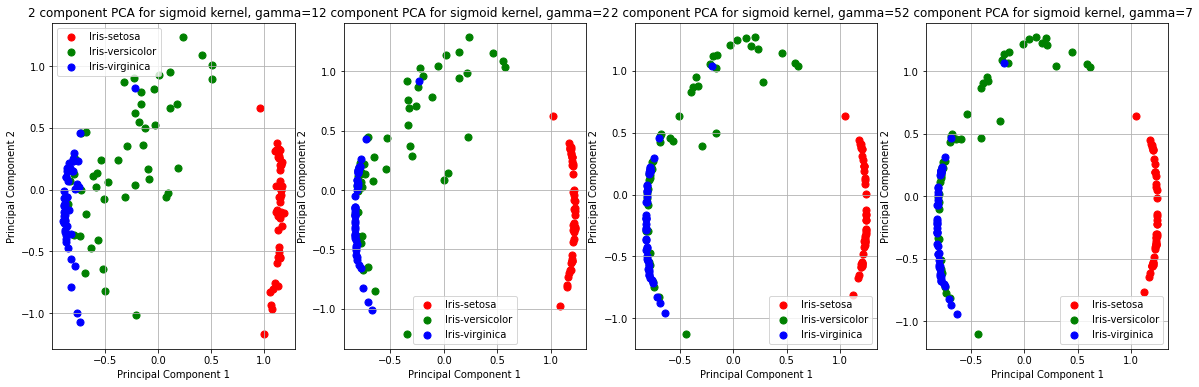

In [197]:
plot4_2d(X_sig2_g1, X_sig2_g2, X_sig2_g5, X_sig2_g7,
    "2 component PCA for sigmoid kernel, gamma=1",
    "2 component PCA for sigmoid kernel, gamma=2",
    "2 component PCA for sigmoid kernel, gamma=5",
    "2 component PCA for sigmoid kernel, gamma=7")

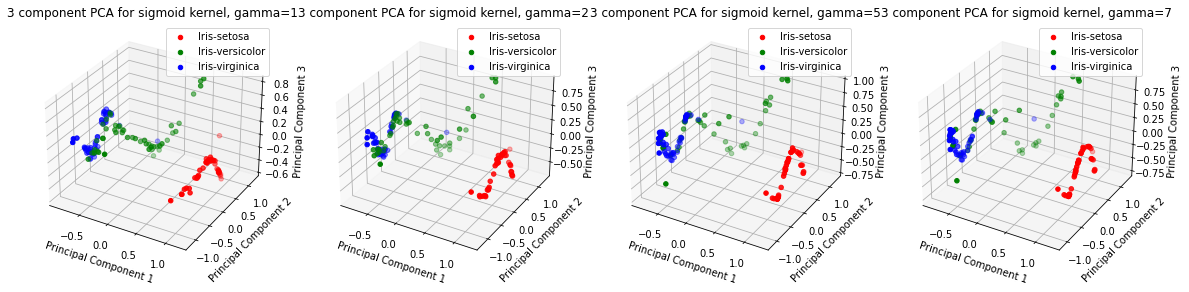

In [198]:
plot4_3d(X_sig3_g1, X_sig3_g2, X_sig3_g5, X_sig3_g7,
    "3 component PCA for sigmoid kernel, gamma=1",
    "3 component PCA for sigmoid kernel, gamma=2",
    "3 component PCA for sigmoid kernel, gamma=5",
    "3 component PCA for sigmoid kernel, gamma=7")

Application of sigmoid PCA for different gammas shows that data are more 'compactly' placed for higher gamma values. The difference from the radius kernel is that even though more datapints are in similar positions, classes are still well separated.

## Poly kernel for different degree parameter

In [173]:
X_poly2_d2 = KernelPCA(kernel='poly', n_components=2, degree=2).fit_transform(X)
X_poly2_d3 = KernelPCA(kernel='poly', n_components=2, degree=3).fit_transform(X)
X_poly2_d5 = KernelPCA(kernel='poly', n_components=2, degree=5).fit_transform(X)
X_poly2_d7 = KernelPCA(kernel='poly', n_components=2, degree=7).fit_transform(X)

X_poly3_d2= KernelPCA(kernel='poly', n_components=3, degree=2).fit_transform(X)
X_poly3_d3 = KernelPCA(kernel='poly', n_components=3, degree=3).fit_transform(X)
X_poly3_d5 = KernelPCA(kernel='poly', n_components=3, degree=5).fit_transform(X)
X_poly3_d7 = KernelPCA(kernel='poly', n_components=3, degree=7).fit_transform(X)

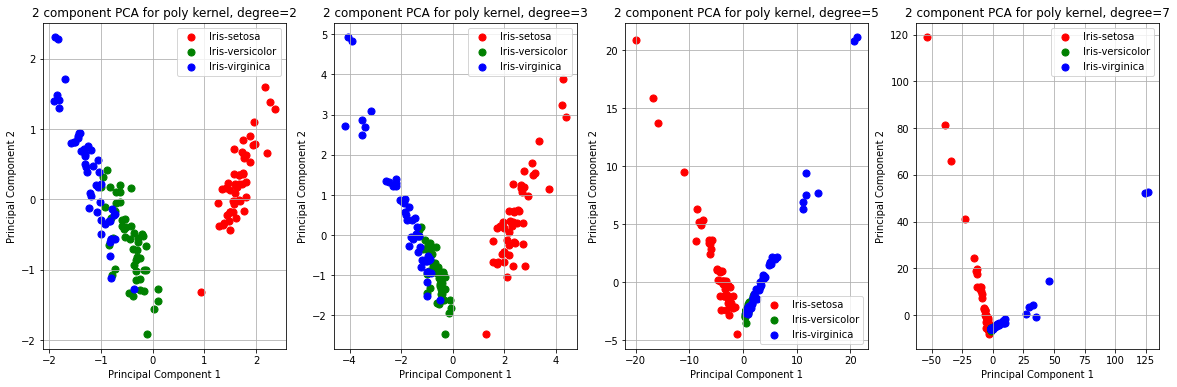

In [194]:
plot4_2d(X_poly2_d2, X_poly2_d3, X_poly2_d5, X_poly2_d7,
    "2 component PCA for poly kernel, degree=2",
    "2 component PCA for poly kernel, degree=3",
    "2 component PCA for poly kernel, degree=5",
    "2 component PCA for poly kernel, degree=7")

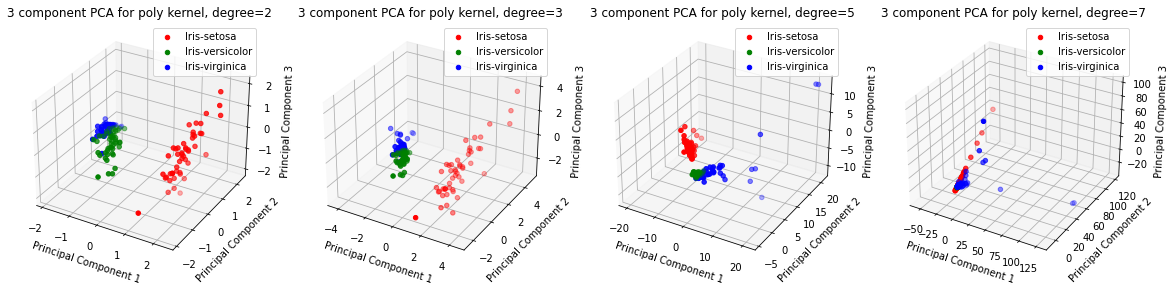

In [195]:
plot4_3d(X_poly3_d2, X_poly3_d3, X_poly3_d5, X_poly3_d7,
    "3 component PCA for poly kernel, degree=2",
    "3 component PCA for poly kernel, degree=3",
    "3 component PCA for poly kernel, degree=5",
    "3 component PCA for poly kernel, degree=7")

Plots for poly kernels show that lower polynomial performs better for IRIS dataset PCA. Higher degree polynomials causes the situation where some points are far from the center of the data, while most of observations from different classes are placed in a small space (which is of course the caluse of the poly degree - making large values). However, 2 or 3 degree polynomials separate classes quite well. 